In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

In [3]:
df = pd.read_csv('C:/Python36/Projects/Diabetes Prediction/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

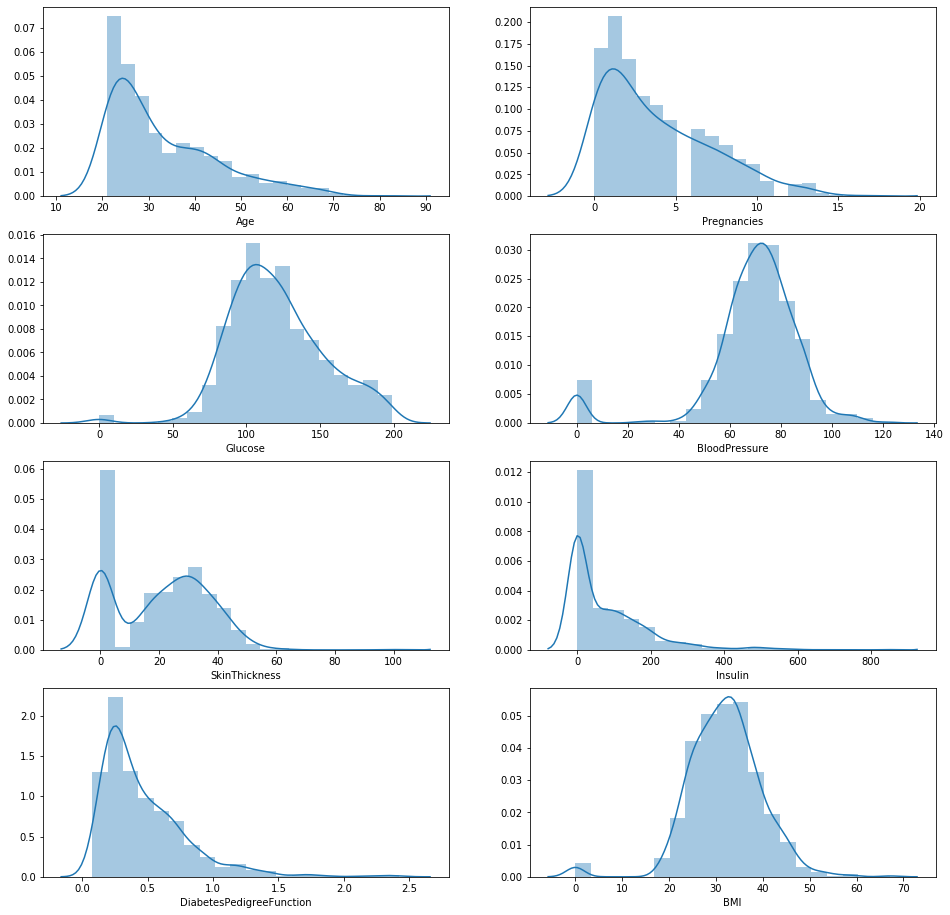

In [7]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

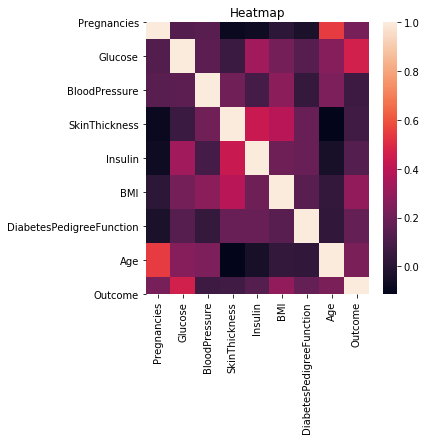

In [8]:
corr = df.corr()
print(corr)
plt.subplots(figsize=(5, 5))
plt.title('Heatmap')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

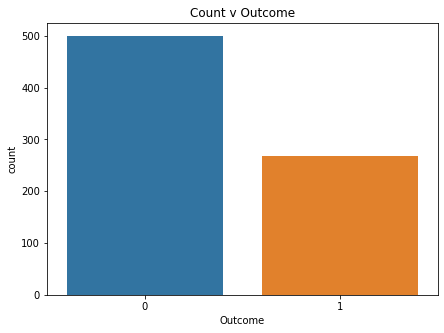

In [9]:
plt.figure(figsize=(7, 5))
sns.countplot(df['Outcome'])
plt.title('Count v Outcome')
plt.show()

In [10]:
x=df.iloc[:,0 : 8]
y=df.iloc[:, 8]

print(x.shape, y.shape)

(768, 8) (768,)


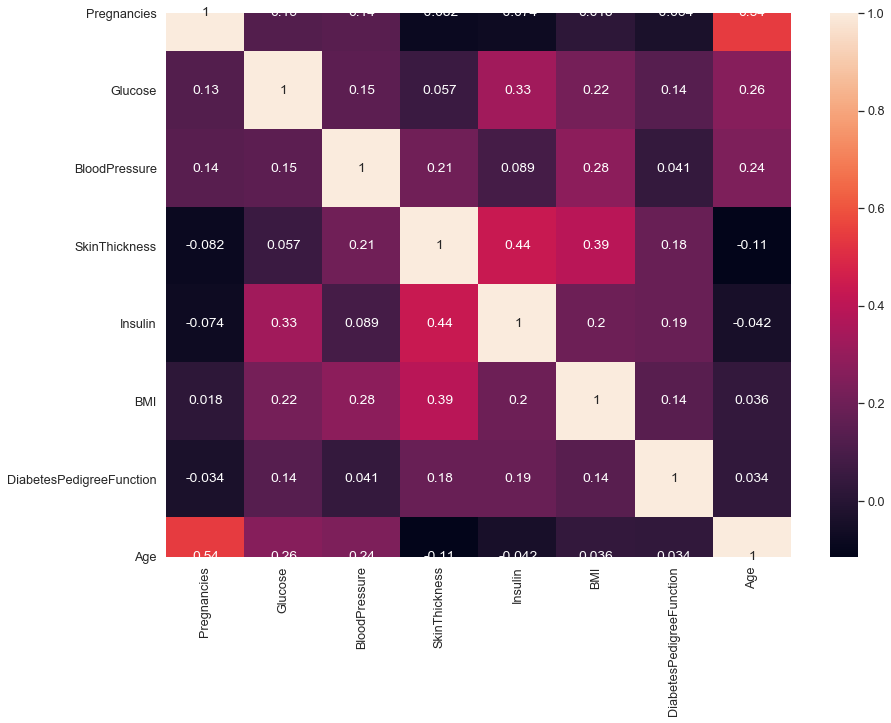

In [36]:
plt.subplots(figsize=(14, 10))
sns.set(font_scale=1.15)
sns.heatmap(x.corr(), annot = True)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [13]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x_train, y_train)
y_pred1 = logreg.predict(x_test)
score1 = accuracy_score(y_test, y_pred1)
score1

C:\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8246753246753247

In [14]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred2 = knn.predict(x_test)
score2 = accuracy_score(y_test, y_pred2)
score2

0.7207792207792207

In [15]:
svc=SVC(gamma='auto')
svc.fit(x_train, y_train)
y_pred3 = svc.predict(x_test)
score3 = accuracy_score(y_test, y_pred3)
score3

0.6948051948051948

In [16]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train, y_train)
y_pred4 = rfc.predict(x_test)
score4 = accuracy_score(y_test, y_pred4)
score4

0.7922077922077922

In [17]:
nb = sklearn.naive_bayes.GaussianNB()
nb.fit(x_train, y_train)
y_pred5 = nb.predict(x_test)
score5 = accuracy_score(y_test, y_pred5)
score5

0.7922077922077922

In [39]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=101,
                              max_features = None, min_samples_leaf=15)
dtree.fit(x_train, y_train)
y_pred6 = dtree.predict(x_test)
score6 = accuracy_score(y_test, y_pred6)
score6

0.8246753246753247

In [40]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred7 = gbc.predict(x_test)
score7 = accuracy_score(y_test, y_pred7)
score7

0.8181818181818182

In [20]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Train on 614 samples
Epoch 1/150
614/614 [==============================] - 0s 215us/sample - loss: 1.9664 - accuracy: 0.6336
Epoch 2/150
614/614 [==============================] - 0s 124us/sample - loss: 1.2554 - accuracy: 0.6482
Epoch 3/150
614/614 [==============================] - 0s 124us/sample - loss: 1.0364 - accuracy: 0.6547
Epoch 4/150
614/614 [==============================] - 0s 124us/sample - loss: 0.9177 - accuracy: 0.6401
Epoch 5/150
614/614 [==============================] - 0s 117us/sample - loss: 0.7938 - accuracy: 0.6352
Epoch 6/150
614/614 [==============================] - 0s 117us/sample - loss: 0.7369 - accuracy: 0.6482
Epoch 7/150
614/614 [==============================] - 0s 124us/sample - loss: 0.7096 - accuracy: 0.6336
Epoch 8/150
614/614 [==============================] - 0s 117us/sample - loss: 0.6710 - accuracy: 0.6726
Epoch 9/150
614/614 [==============================] - 0s 117us/sample - loss: 0.6565 - accuracy: 0.6694
Epoch 10/150
614/614 [============

614/614 [==============================] - 0s 124us/sample - loss: 0.5245 - accuracy: 0.7427
Epoch 77/150
614/614 [==============================] - 0s 124us/sample - loss: 0.5156 - accuracy: 0.7476
Epoch 78/150
614/614 [==============================] - 0s 111us/sample - loss: 0.5262 - accuracy: 0.7248
Epoch 79/150
614/614 [==============================] - 0s 117us/sample - loss: 0.5137 - accuracy: 0.7524
Epoch 80/150
614/614 [==============================] - 0s 104us/sample - loss: 0.5280 - accuracy: 0.7394
Epoch 81/150
614/614 [==============================] - 0s 111us/sample - loss: 0.5268 - accuracy: 0.7313
Epoch 82/150
614/614 [==============================] - 0s 117us/sample - loss: 0.5274 - accuracy: 0.7492
Epoch 83/150
614/614 [==============================] - 0s 132us/sample - loss: 0.5248 - accuracy: 0.7362
Epoch 84/150
614/614 [==============================] - 0s 124us/sample - loss: 0.5114 - accuracy: 0.7476
Epoch 85/150
614/614 [==============================] - 0s 

In [23]:
score8 = model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], score8[1]*100))

614/614 [==============================] - 0s 46us/sample - loss: 0.4728 - accuracy: 0.7622

accuracy: 76.22%


In [24]:
predictions = model.predict(x_test)

In [25]:
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [26]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

154/154 [==============================] - 0s 78us/sample - loss: 0.5256 - accuracy: 0.7792

accuracy: 77.92%
